In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file=pd.read_csv("/media/weatherHistory.csv")

In [ ]:
file.head(5)

Formatted Date  ...                      Daily Summary
0  2006-04-01 00:00:00.000 +0200  ...  Partly cloudy throughout the day.
1  2006-04-01 01:00:00.000 +0200  ...  Partly cloudy throughout the day.
2  2006-04-01 02:00:00.000 +0200  ...  Partly cloudy throughout the day.
3  2006-04-01 03:00:00.000 +0200  ...  Partly cloudy throughout the day.
4  2006-04-01 04:00:00.000 +0200  ...  Partly cloudy throughout the day.

[5 rows x 12 columns]

In [ ]:
file.tail(5)


Formatted Date  ...                           Daily Summary
96448  2016-09-09 19:00:00.000 +0200  ...  Partly cloudy starting in the morning.
96449  2016-09-09 20:00:00.000 +0200  ...  Partly cloudy starting in the morning.
96450  2016-09-09 21:00:00.000 +0200  ...  Partly cloudy starting in the morning.
96451  2016-09-09 22:00:00.000 +0200  ...  Partly cloudy starting in the morning.
96452  2016-09-09 23:00:00.000 +0200  ...  Partly cloudy starting in the morning.

[5 rows x 12 columns]

In [ ]:
file.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [ ]:
file.describe()

Temperature (C)  ...  Pressure (millibars)
count     96453.000000  ...          96453.000000
mean         11.932678  ...           1003.235956
std           9.551546  ...            116.969906
min         -21.822222  ...              0.000000
25%           4.688889  ...           1011.900000
50%          12.000000  ...           1016.450000
75%          18.838889  ...           1021.090000
max          39.905556  ...           1046.380000

[8 rows x 8 columns]

In [ ]:
file['Formatted Date'] = pd.to_datetime(file['Formatted Date'], utc=True)
file['Formatted Date']

0       2006-03-31 22:00:00+00:00
1       2006-03-31 23:00:00+00:00
2       2006-04-01 00:00:00+00:00
3       2006-04-01 01:00:00+00:00
4       2006-04-01 02:00:00+00:00
                   ...           
96448   2016-09-09 17:00:00+00:00
96449   2016-09-09 18:00:00+00:00
96450   2016-09-09 19:00:00+00:00
96451   2016-09-09 20:00:00+00:00
96452   2016-09-09 21:00:00+00:00
Name: Formatted Date, Length: 96453, dtype: datetime64[ns, UTC]

In [ ]:
file = file.set_index('Formatted Date')
file.head()

Summary  ...                      Daily Summary
Formatted Date                            ...                                   
2006-03-31 22:00:00+00:00  Partly Cloudy  ...  Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00  Partly Cloudy  ...  Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00  Mostly Cloudy  ...  Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00  Partly Cloudy  ...  Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00  Mostly Cloudy  ...  Partly cloudy throughout the day.

[5 rows x 11 columns]

In [ ]:
data_columns = ['Apparent Temperature (C)', 'Humidity']
df_monthly_mean = file[data_columns].resample('MS').mean()
df_monthly_mean.head()

Apparent Temperature (C)  Humidity
Formatted Date                                               
2005-12-01 00:00:00+00:00                 -4.050000  0.890000
2006-01-01 00:00:00+00:00                 -4.173708  0.834610
2006-02-01 00:00:00+00:00                 -2.990716  0.843467
2006-03-01 00:00:00+00:00                  1.969780  0.778737
2006-04-01 00:00:00+00:00                 12.098827  0.728625

In [ ]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(14,6))
plt.title("Variation in Apparent Temperature and Humidity with time")
sns.lineplot(data=df_monthly_mean)

In [ ]:
df1 = df_monthly_mean[df_monthly_mean.index.month==4]
print(df1)

df1.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-04-01 00:00:00+00:00                 12.098827  0.728625
2007-04-01 00:00:00+00:00                 11.894421  0.536361
2008-04-01 00:00:00+00:00                 11.183688  0.693194
2009-04-01 00:00:00+00:00                 14.267076  0.567847
2010-04-01 00:00:00+00:00                 11.639406  0.706875
2011-04-01 00:00:00+00:00                 12.978997  0.591625
2012-04-01 00:00:00+00:00                 11.782770  0.650222
2013-04-01 00:00:00+00:00                 12.045563  0.677667
2014-04-01 00:00:00+00:00                 12.486181  0.691403
2015-04-01 00:00:00+00:00                 10.632801  0.547764
2016-04-01 00:00:00+00:00                 12.731427  0.659972


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

Text(0.5, 0, 'Month of April')

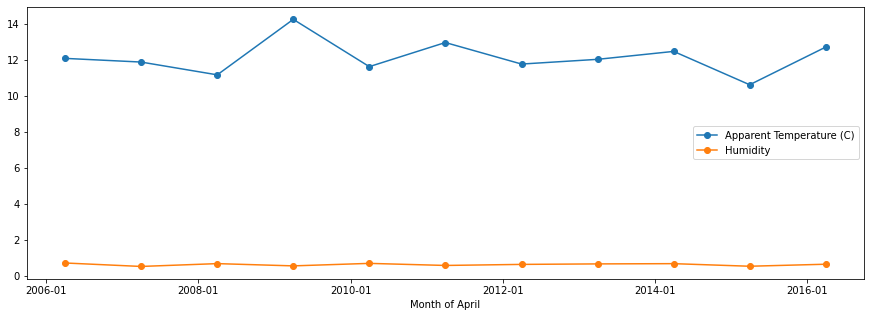

In [ ]:
import matplotlib.dates as mdates
from datetime import datetime 

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df1.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)')
ax.plot(df1.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-',label='Humidity')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.legend(loc = 'center right')
ax.set_xlabel('Month of April')